In [62]:
# 組み合わせた際の精度

In [63]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Input, concatenate
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random
from scipy import signal

In [217]:
## データについて

### データファイルのpath
no_hole_path = './../vibration_simulation/vibration_data/no_hole_data.csv'
one_hole_path = './../vibration_simulation/vibration_data/one_hole_data.csv'
four_holes_path = './../vibration_simulation/vibration_data/four_holes_data.csv'
nine_holes_path = './../vibration_simulation/vibration_data/nine_holes_data.csv'
sixteen_holes_path = './../vibration_simulation/vibration_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../vibration_simulation/vibration_data/twentyfive_holes_data.csv'

### 入力データと正解データ
size_x_data_list1 = []
size_x_data_list2 = []
size_x_data_list3 = []
y_size_data_array = []
no_hole_data1 = []
one_one_one1 = []
one_two_two1 = []
one_three_three1 = []
one_four_four1 = []
one_five_five1 = []
two_one_two1 = []
two_two_three1 = []
two_three_four1 = []
two_four_five1 = []
two_five_one1 = []
three_one_three1 = []
three_two_four1 = []
three_three_five1 = []
three_four_one1 = []
three_five_two1 = []
four_one_four1 = []
four_two_five1 = []
four_three_one1 = []
four_four_two1 = []
four_five_three1 = []
five_one_five1 = []
five_two_one1 = []
five_three_two1 = []
five_four_three1 = []
five_five_four1 = []
no_hole_data2 = []
one_one_one2 = []
one_two_two2 = []
one_three_three2 = []
one_four_four2 = []
one_five_five2 = []
two_one_two2 = []
two_two_three2 = []
two_three_four2 = []
two_four_five2 = []
two_five_one2 = []
three_one_three2 = []
three_two_four2 = []
three_three_five2 = []
three_four_one2 = []
three_five_two2 = []
four_one_four2 = []
four_two_five2 = []
four_three_one2 = []
four_four_two2 = []
four_five_three2 = []
five_one_five2 = []
five_two_one2 = []
five_three_two2 = []
five_four_three2 = []
five_five_four2 = []
no_hole_data3 = []
one_one_one3 = []
one_two_two3 = []
one_three_three3 = []
one_four_four3 = []
one_five_five3 = []
two_one_two3 = []
two_two_three3 = []
two_three_four3 = []
two_four_five3 = []
two_five_one3 = []
three_one_three3 = []
three_two_four3 = []
three_three_five3 = []
three_four_one3 = []
three_five_two3 = []
four_one_four3 = []
four_two_five3 = []
four_three_one3 = []
four_four_two3 = []
four_five_three3 = []
five_one_five3 = []
five_two_one3 = []
five_three_two3 = []
five_four_three3 = []
five_five_four3 = []
rep_freq_array1 = []
rep_freq_array2 = []
rep_freq_array3 = []

### ファイル読み込み

#### 欠陥がない場合のデータ
with open(no_hole_path) as f:
    for line in f:
        data_array = line.split(' ')
        no_hole_data1 = data_array[0:1251]
        no_hole_data2 = data_array[1251:2502]
        no_hole_data3 = data_array[2502:-1]

#### データ分類
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 0 < position[1] and position[1] < 10):
        one_one_one1.append(data_array[3:1254])
        one_one_one2.append(data_array[1254:2505])
        one_one_one3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 10 < position[1] and position[1] < 20):
        one_two_two1.append(data_array[3:1254])
        one_two_two2.append(data_array[1254:2505])
        one_two_two3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 20 < position[1] and position[1] < 30):
        one_three_three1.append(data_array[3:1254])
        one_three_three2.append(data_array[1254:2505])
        one_three_three3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 30 < position[1] and position[1] < 40):
        one_four_four1.append(data_array[3:1254])
        one_four_four2.append(data_array[1254:2505])
        one_four_four3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 40 < position[1] and position[1] < 50):
        one_five_five1.append(data_array[3:1254])
        one_five_five2.append(data_array[1254:2505])
        one_five_five3.append(data_array[2505:-1])
with open(four_holes_path) as fs2:
  for line in fs2:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 10 < position[1] and position[1] < 20):
        two_one_two1.append(data_array[3:1254])
        two_one_two2.append(data_array[1254:2505])
        two_one_two3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 20 < position[1] and position[1] < 30):
        two_two_three1.append(data_array[3:1254])
        two_two_three2.append(data_array[1254:2505])
        two_two_three3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 30 < position[1] and position[1] < 40):
        two_three_four1.append(data_array[3:1254])
        two_three_four2.append(data_array[1254:2505])
        two_three_four3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 40 < position[1] and position[1] < 50):
        two_four_five1.append(data_array[3:1254])
        two_four_five2.append(data_array[1254:2505])
        two_four_five3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 0 < position[1] and position[1] < 10):
        two_five_one1.append(data_array[3:1254])
        two_five_one2.append(data_array[1254:2505])
        two_five_one3.append(data_array[2505:-1])
with open(nine_holes_path) as fs3:
  for line in fs3:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 20 < position[1] and position[1] < 30):
        three_one_three1.append(data_array[3:1254])
        three_one_three2.append(data_array[1254:2505])
        three_one_three3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 30 < position[1] and position[1] < 40):
        three_two_four1.append(data_array[3:1254])
        three_two_four2.append(data_array[1254:2505])
        three_two_four3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 40 < position[1] and position[1] < 50):
        three_three_five1.append(data_array[3:1254])
        three_three_five2.append(data_array[1254:2505])
        three_three_five3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 0 < position[1] and position[1] < 10):
        three_four_one1.append(data_array[3:1254])
        three_four_one2.append(data_array[1254:2505])
        three_four_one3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 10 < position[1] and position[1] < 20):
        three_five_two1.append(data_array[3:1254])
        three_five_two2.append(data_array[1254:2505])
        three_five_two3.append(data_array[2505:-1])
with open(sixteen_holes_path) as fs4:
  for line in fs4:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 30 < position[1] and position[1] < 40):
        four_one_four1.append(data_array[3:1254])
        four_one_four2.append(data_array[1254:2505])
        four_one_four3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 40 < position[1] and position[1] < 50):
        four_two_five1.append(data_array[3:1254])
        four_two_five2.append(data_array[1254:2505])
        four_two_five3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 0 < position[1] and position[1] < 10):
        four_three_one1.append(data_array[3:1254])
        four_three_one2.append(data_array[1254:2505])
        four_three_one3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 10 < position[1] and position[1] < 20):
        four_four_two1.append(data_array[3:1254])
        four_four_two2.append(data_array[1254:2505])
        four_four_two3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 20 < position[1] and position[1] < 30):
        four_five_three1.append(data_array[3:1254])
        four_five_three2.append(data_array[1254:2505])
        four_five_three3.append(data_array[2505:-1])
with open(twentyfive_holes_path) as fs5:
  for line in fs5:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 40 < position[1] and position[1] < 50):
        five_one_five1.append(data_array[3:1254])
        five_one_five2.append(data_array[1254:2505])
        five_one_five3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 0 < position[1] and position[1] < 10):
        five_two_one1.append(data_array[3:1254])
        five_two_one2.append(data_array[1254:2505])
        five_two_one3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 10 < position[1] and position[1] < 20):
        five_three_two1.append(data_array[3:1254])
        five_three_two2.append(data_array[1254:2505])
        five_three_two3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 20 < position[1] and position[1] < 30):
        five_four_three1.append(data_array[3:1254])
        five_four_three2.append(data_array[1254:2505])
        five_four_three3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 30 < position[1] and position[1] < 40):
        five_five_four1.append(data_array[3:1254])
        five_five_four2.append(data_array[1254:2505])
        five_five_four3.append(data_array[2505:-1])
### 利用データの決定
for j in range(1):
    size_x_data1 = []
    size_x_data2 = []
    size_x_data3 = []
    size_y_data = []
#     position_x_data = []
#     position_y_data = []
    #### one_one_oneについて
    index = []
    for i in range(len(one_one_one1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_one_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_one_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_one_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### one_two_twoについて
    index = []
    for i in range(len(one_two_two1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_two_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_two_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_two_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### one_three_threeについて
    index = []
    for i in range(len(one_three_three1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_three_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_three_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_three_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### one_four_fourについて
    index = []
    for i in range(len(one_four_four1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_four_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_four_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_four_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### one_five_fiveについて
    index = []
    for i in range(len(one_five_five1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_five_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_five_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_five_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### two_one_twoについて
    index = []
    for i in range(len(two_one_two1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_one_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_one_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_one_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### two_two_threeについて
    index = []
    for i in range(len(two_two_three1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_two_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_two_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_two_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### two_three_fourについて
    index = []
    for i in range(len(two_three_four1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_three_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_three_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_three_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### two_four_fiveについて
    index = []
    for i in range(len(two_four_five1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_four_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_four_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_four_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### two_five_oneについて
    index = []
    for i in range(len(two_five_one1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_five_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_five_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_five_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### three_one_threeについて
    index = []
    for i in range(len(three_one_three1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_one_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_one_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_one_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### three_two_fourについて
    index = []
    for i in range(len(three_two_four1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_two_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_two_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_two_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### three_three_fiveについて
    index = []
    for i in range(len(three_three_five1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_three_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_three_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_three_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### three_four_oneについて
    index = []
    for i in range(len(three_four_one1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_four_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_four_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_four_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### three_five_twoについて
    index = []
    for i in range(len(three_five_two1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_five_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_five_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_five_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### four_one_fourについて
    index = []
    for i in range(len(four_one_four1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_one_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_one_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_one_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### four_two_fiveについて
    index = []
    for i in range(len(four_two_five1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_two_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_two_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_two_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### four_three_oneについて
    index = []
    for i in range(len(four_three_one1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_three_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_three_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_three_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### four_four_twoについて
    index = []
    for i in range(len(four_four_two1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_four_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_four_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_four_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### four_five_threeについて
    index = []
    for i in range(len(four_five_three1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_five_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_five_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_five_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### five_one_fiveについて
    index = []
    for i in range(len(five_one_five1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_one_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_one_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_one_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)
    #### five_two_oneについて
    index = []
    for i in range(len(five_two_one1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_two_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_two_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_two_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)
    #### five_three_twoについて
    index = []
    for i in range(len(five_three_two1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_three_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_three_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_three_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)
    #### five_four_threeについて
    index = []
    for i in range(len(five_four_three1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_four_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_four_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_four_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)
    #### five_five_fourについて
    index = []
    for i in range(len(five_five_four1)):
        index.append(i)
    data_count = 12*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_five_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_five_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_five_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)

    ### 各配列をnp.array型にして各要素を型変換
    no_hole_data1 = np.array(no_hole_data1, dtype=float)
    no_hole_data2 = np.array(no_hole_data2, dtype=float)
    no_hole_data3 = np.array(no_hole_data3, dtype=float)
    size_x_data1 = np.array(size_x_data1, dtype=float)
    size_x_data2 = np.array(size_x_data2, dtype=float)
    size_x_data3 = np.array(size_x_data3, dtype=float)
    size_y_data = np.array(size_y_data, dtype=float)
    
    size_x_data_list1.append(size_x_data1)
    size_x_data_list2.append(size_x_data2)
    size_x_data_list3.append(size_x_data3)
    y_size_data_array.append(size_y_data)

#各振動を高速フーリエ変換→代表周波数のリスト作成→該当周波数のみの振幅を入力とする
## 欠陥なしデータ
F_no_hole1 = np.fft.fft(no_hole_data1)
N = len(no_hole_data1)
Amp_no_hole1 = np.abs(F_no_hole1/(N/2))
maxid_no_hole1 = signal.argrelmax(Amp_no_hole1[1:int(N/2)], order=1)
rep_index_no_hole1 = maxid_no_hole1[0]
for i in range(len(rep_index_no_hole1)):
    if (rep_index_no_hole1[i] in rep_freq_array1) == False:
        rep_freq_array1.append(rep_index_no_hole1[i])
F_no_hole2 = np.fft.fft(no_hole_data2)
Amp_no_hole2 = np.abs(F_no_hole2/(N/2))
maxid_no_hole2 = signal.argrelmax(Amp_no_hole2[1:int(N/2)], order=1)
rep_index_no_hole2 = maxid_no_hole2[0]
for i in range(len(rep_index_no_hole2)):
    if (rep_index_no_hole2[i] in rep_freq_array2) == False:
        rep_freq_array2.append(rep_index_no_hole2[i])
F_no_hole3 = np.fft.fft(no_hole_data3)
Amp_no_hole3 = np.abs(F_no_hole3/(N/2))
maxid_no_hole3 = signal.argrelmax(Amp_no_hole3[1:int(N/2)], order=1)
rep_index_no_hole3 = maxid_no_hole3[0]
for i in range(len(rep_index_no_hole3)):
    if (rep_index_no_hole3[i] in rep_freq_array3) == False:
        rep_freq_array3.append(rep_index_no_hole3[i])
# 欠陥ありデータ
N = len(no_hole_data1)
fft_size_x_data_array1 = []
fft_size_x_data_array2 = []
fft_size_x_data_array3 = []
for i in range(len(size_x_data_list1)):
    fft_size_x_data1 = []
    fft_size_x_data2 = []
    fft_size_x_data3 = []
    size_x_data1 = size_x_data_list1[i]
    size_x_data2 = size_x_data_list2[i]
    size_x_data3 = size_x_data_list3[i]
    ### 観測点1
    for j in range(len(size_x_data1)):
        F = np.fft.fft(size_x_data1[j])
        Amp = np.abs(F/(N/2))
        fft_size_x_data1.append(Amp)
        maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
        rep_index = maxid[0]
        for k in range(len(rep_index)):
            if (rep_index[k] in rep_freq_array1) == False:
                rep_freq_array1.append(rep_index[k])
    ### 観測点2
    for j in range(len(size_x_data2)):
        F = np.fft.fft(size_x_data2[j])
        Amp = np.abs(F/(N/2))
        fft_size_x_data2.append(Amp)
        maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
        rep_index = maxid[0]
        for k in range(len(rep_index)):
            if (rep_index[k] in rep_freq_array2) == False:
                rep_freq_array2.append(rep_index[k])
    ### 観測点3
    for j in range(len(size_x_data3)):
        F = np.fft.fft(size_x_data3[j])
        Amp = np.abs(F/(N/2))
        fft_size_x_data3.append(Amp)
        maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
        rep_index = maxid[0]
        for k in range(len(rep_index)):
            if (rep_index[k] in rep_freq_array3) == False:
                rep_freq_array3.append(rep_index[k])
    fft_size_x_data_array1.append(fft_size_x_data1)
    fft_size_x_data_array2.append(fft_size_x_data2)
    fft_size_x_data_array3.append(fft_size_x_data3)
#入力値の更新(振動→代表周波数の振幅)
x_size_data_array1 = []
x_size_data_array2 = []
x_size_data_array3 = []
for i in range(len(size_x_data_list1)):
    ## 観測点1
    fft_size_x_data1 = fft_size_x_data_array1[i]
    size_x_data1 = []
    for j in range(len(fft_size_x_data1)):
        rep_amp = []
        for k in range(len(rep_freq_array1)):
            rep_amp.append(fft_size_x_data1[j][k]-Amp_no_hole1[k])
        size_x_data1.append(rep_amp)
    x_size_data_array1.append(size_x_data1)
    ## 観測点2
    fft_size_x_data2 = fft_size_x_data_array2[i]
    size_x_data2 = []
    for j in range(len(fft_size_x_data2)):
        rep_amp = []
        for k in range(len(rep_freq_array2)):
            rep_amp.append(fft_size_x_data2[j][k]-Amp_no_hole2[k])
        size_x_data2.append(rep_amp)
    x_size_data_array2.append(size_x_data2)
    ## 観測点3
    fft_size_x_data3 = fft_size_x_data_array3[i]
    size_x_data3 = []
    for j in range(len(fft_size_x_data3)):
        rep_amp = []
        for k in range(len(rep_freq_array3)):
            rep_amp.append(fft_size_x_data3[j][k]-Amp_no_hole3[k])
        size_x_data3.append(rep_amp)
    x_size_data_array3.append(size_x_data3)

    
## データの加工
###最大値で割る
max_displacement1 = 0
max_displacement2 = 0
max_displacement3 = 0
for i in range(len(x_size_data_array1)):
    x_size_data1 = x_size_data_array1[i]
    for j in range(len(x_size_data1)):
        displacement1 = x_size_data1[j]
        for k in range(len(displacement1)):
            if max_displacement1 < displacement1[k]:
                max_displacement1 = displacement1[k]
for i in range(len(x_size_data_array2)):
    x_size_data2 = x_size_data_array2[i]
    for j in range(len(x_size_data2)):
        displacement2 = x_size_data2[j]
        for k in range(len(displacement2)):
            if max_displacement2 < displacement2[k]:
                max_displacement2 = displacement2[k]
for i in range(len(x_size_data_array3)):
    x_size_data3 = x_size_data_array3[i]
    for j in range(len(x_size_data3)):
        displacement3 = x_size_data3[j]
        for k in range(len(displacement3)):
            if max_displacement3 < displacement3[k]:
                max_displacement3 = displacement3[k]
for i in range(len(x_size_data_array1)):
    for j in range(len(x_size_data_array1[i])):
        for k in range(len(x_size_data_array1[i][j])):
            x_size_data_array1[i][j][k] = x_size_data_array1[i][j][k]/max_displacement1
for i in range(len(x_size_data_array2)):
    for j in range(len(x_size_data_array2[i])):
        for k in range(len(x_size_data_array2[i][j])):
            x_size_data_array2[i][j][k] = x_size_data_array2[i][j][k]/max_displacement2
for i in range(len(x_size_data_array3)):
    for j in range(len(x_size_data_array3[i])):
        for k in range(len(x_size_data_array3[i][j])):
            x_size_data_array3[i][j][k] = x_size_data_array3[i][j][k]/max_displacement3

### train用とtest用に分割(9:1)
x_size_train_array1 = []
x_size_train_array2 = []
x_size_train_array3 = []
x_size_test_array1 = []
x_size_test_array2 = []
x_size_test_array3 = []
y_size_train_array = []
y_size_test_array = []
for i in range(1):
    x_size_train1, x_size_test1, x_size_train2, x_size_test2, x_size_train3, x_size_test3, y_size_train, y_size_test = train_test_split(x_size_data_array1[i], x_size_data_array2[i], x_size_data_array3[i], y_size_data_array[i], test_size=0.10)
    x_size_train_array1.append(np.array(x_size_train1))
    x_size_train_array2.append(np.array(x_size_train2))
    x_size_train_array3.append(np.array(x_size_train3))
    x_size_test_array1.append(np.array(x_size_test1))
    x_size_test_array2.append(np.array(x_size_test2))
    x_size_test_array3.append(np.array(x_size_test3))
    y_size_train_array.append(np.array(y_size_train))
    y_size_test_array.append(np.array(y_size_test))

In [218]:
print(len(x_size_train_array1[0][0]))
print(len(x_size_train_array2[0][0]))
print(len(x_size_train_array3[0][0]))

34
51
41


In [219]:
# 大きさ推定のモデル
model_size_array = []

for i in range(1):
    # 入力を定義
    input1 = Input(shape=(34,1))
    input2 = Input(shape=(51,1))
    input3 = Input(shape=(41,1))

    # 入力1から結合前まで
    x = Conv1D(32, 3, padding='same', activation='tanh')(input1)
    x = MaxPooling1D(2, padding='same')(x)
    x = Model(inputs=input1, outputs=x)
    # 入力2から結合前まで
    y = Conv1D(32, 3, padding='same', activation='tanh')(input2)
    y = MaxPooling1D(2, padding='same')(y)
    y = Model(inputs=input2, outputs=y)
    # 入力3から結合前まで
    z = Conv1D(32, 3, padding='same', activation='tanh')(input3)
    z = MaxPooling1D(2, padding='same')(z)
    z = Model(inputs=input3, outputs=z)

    # 結合
    combined = concatenate([x.output, y.output, z.output], axis = 1)

    # 密結合
    cnn = Flatten()(combined)
    cnn = Dense(1, activation="linear")(cnn)

    # モデル定義とコンパイル
    cnn_size_model = Model(inputs=[x.input, y.input, z.input], outputs=cnn)
    cnn_size_model.compile(loss='mse', optimizer='adam', metrics=['acc'])
    model_size_array.append(cnn_size_model)

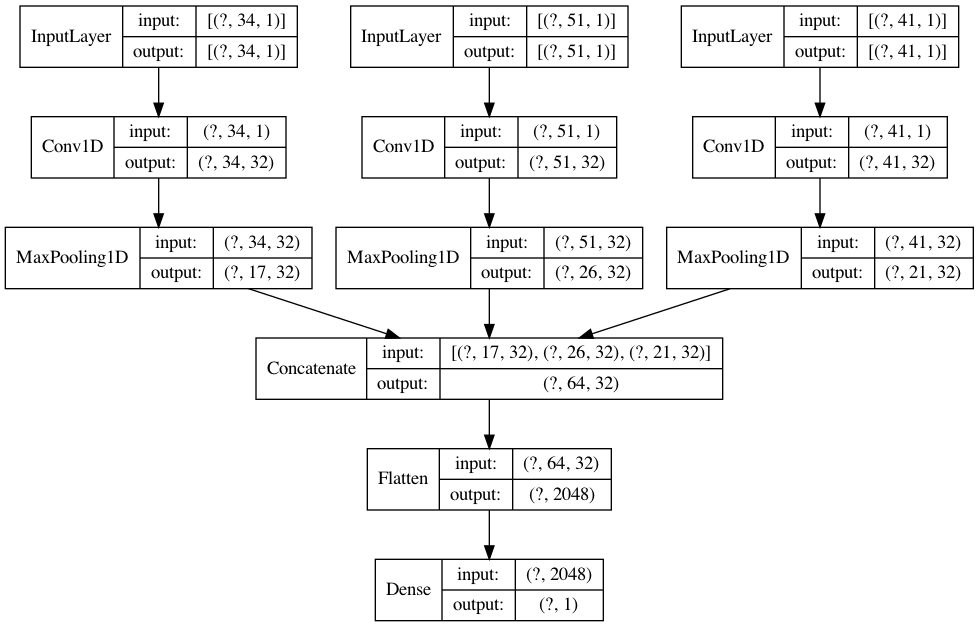

In [220]:
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model_size_array[0], show_shapes=True, show_layer_names=False)

In [221]:
# 学習ループ
history_size_array = []
for i in range(len(model_size_array)):
    epochs = 1000
    batch_size = 128
    history_size_array.append(model_size_array[i].fit([x_size_train_array1[i], x_size_train_array2[i], x_size_train_array3[i]], y_size_train_array[i], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_size_test_array1[i], x_size_test_array2[i], x_size_test_array3[i]], y_size_test_array[i])))

Epoch 1/1000
3/3 [==============================] - 0s 124ms/step - loss: 11.4554 - acc: 0.0000e+00 - val_loss: 6.3877 - val_acc: 0.0000e+00
Epoch 2/1000
3/3 [==============================] - 0s 37ms/step - loss: 11.1010 - acc: 0.0000e+00 - val_loss: 6.0646 - val_acc: 0.0000e+00
Epoch 3/1000
3/3 [==============================] - 0s 50ms/step - loss: 10.6012 - acc: 0.0000e+00 - val_loss: 5.6245 - val_acc: 0.0000e+00
Epoch 4/1000
3/3 [==============================] - 0s 54ms/step - loss: 9.9365 - acc: 0.0000e+00 - val_loss: 5.0670 - val_acc: 0.0000e+00
Epoch 5/1000
3/3 [==============================] - 0s 44ms/step - loss: 9.0679 - acc: 0.0000e+00 - val_loss: 4.4089 - val_acc: 0.3667
Epoch 6/1000
3/3 [==============================] - 0s 37ms/step - loss: 8.0522 - acc: 0.1815 - val_loss: 3.6844 - val_acc: 0.3667
Epoch 7/1000
3/3 [==============================] - 0s 43ms/step - loss: 6.8916 - acc: 0.1815 - val_loss: 2.9543 - val_acc: 0.3667
Epoch 8/1000
3/3 [=========================

Epoch 63/1000
3/3 [==============================] - 0s 33ms/step - loss: 1.5754 - acc: 0.1815 - val_loss: 2.0704 - val_acc: 0.3667
Epoch 64/1000
3/3 [==============================] - 0s 38ms/step - loss: 1.5665 - acc: 0.1815 - val_loss: 2.1036 - val_acc: 0.3667
Epoch 65/1000
3/3 [==============================] - 0s 37ms/step - loss: 1.5599 - acc: 0.1815 - val_loss: 2.1251 - val_acc: 0.3667
Epoch 66/1000
3/3 [==============================] - 0s 34ms/step - loss: 1.5532 - acc: 0.1815 - val_loss: 2.1518 - val_acc: 0.3667
Epoch 67/1000
3/3 [==============================] - 0s 32ms/step - loss: 1.5485 - acc: 0.1815 - val_loss: 2.1881 - val_acc: 0.3667
Epoch 68/1000
3/3 [==============================] - 0s 33ms/step - loss: 1.5444 - acc: 0.1815 - val_loss: 2.2123 - val_acc: 0.3667
Epoch 69/1000
3/3 [==============================] - 0s 32ms/step - loss: 1.5402 - acc: 0.1815 - val_loss: 2.1858 - val_acc: 0.3667
Epoch 70/1000
3/3 [==============================] - 0s 35ms/step - loss: 1.

Epoch 125/1000
3/3 [==============================] - 0s 41ms/step - loss: 1.2044 - acc: 0.1815 - val_loss: 1.4715 - val_acc: 0.3667
Epoch 126/1000
3/3 [==============================] - 0s 32ms/step - loss: 1.1947 - acc: 0.1815 - val_loss: 1.5797 - val_acc: 0.3667
Epoch 127/1000
3/3 [==============================] - 0s 33ms/step - loss: 1.1886 - acc: 0.1815 - val_loss: 1.6734 - val_acc: 0.3667
Epoch 128/1000
3/3 [==============================] - 0s 34ms/step - loss: 1.1934 - acc: 0.1815 - val_loss: 1.7555 - val_acc: 0.3667
Epoch 129/1000
3/3 [==============================] - 0s 34ms/step - loss: 1.2026 - acc: 0.1815 - val_loss: 1.8109 - val_acc: 0.3667
Epoch 130/1000
3/3 [==============================] - 0s 33ms/step - loss: 1.2086 - acc: 0.1815 - val_loss: 1.7650 - val_acc: 0.3667
Epoch 131/1000
3/3 [==============================] - 0s 34ms/step - loss: 1.1942 - acc: 0.1815 - val_loss: 1.6261 - val_acc: 0.3667
Epoch 132/1000
3/3 [==============================] - 0s 34ms/step - 

3/3 [==============================] - 0s 35ms/step - loss: 1.0775 - acc: 0.1815 - val_loss: 1.4902 - val_acc: 0.3667
Epoch 187/1000
3/3 [==============================] - 0s 35ms/step - loss: 1.0744 - acc: 0.1815 - val_loss: 1.4543 - val_acc: 0.3667
Epoch 188/1000
3/3 [==============================] - 0s 33ms/step - loss: 1.0693 - acc: 0.1815 - val_loss: 1.4033 - val_acc: 0.3667
Epoch 189/1000
3/3 [==============================] - 0s 31ms/step - loss: 1.0673 - acc: 0.1815 - val_loss: 1.3540 - val_acc: 0.3667
Epoch 190/1000
3/3 [==============================] - 0s 31ms/step - loss: 1.0666 - acc: 0.1815 - val_loss: 1.3909 - val_acc: 0.3667
Epoch 191/1000
3/3 [==============================] - 0s 33ms/step - loss: 1.0614 - acc: 0.1815 - val_loss: 1.5361 - val_acc: 0.3667
Epoch 192/1000
3/3 [==============================] - 0s 33ms/step - loss: 1.0764 - acc: 0.1815 - val_loss: 1.6718 - val_acc: 0.3667
Epoch 193/1000
3/3 [==============================] - 0s 38ms/step - loss: 1.0968 - 

Epoch 248/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.9622 - acc: 0.1815 - val_loss: 1.3122 - val_acc: 0.3667
Epoch 249/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.9601 - acc: 0.1815 - val_loss: 1.2732 - val_acc: 0.3667
Epoch 250/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.9620 - acc: 0.1815 - val_loss: 1.2351 - val_acc: 0.3667
Epoch 251/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.9575 - acc: 0.1815 - val_loss: 1.2917 - val_acc: 0.3667
Epoch 252/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.9565 - acc: 0.1815 - val_loss: 1.3761 - val_acc: 0.3667
Epoch 253/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.9622 - acc: 0.1815 - val_loss: 1.4660 - val_acc: 0.3667
Epoch 254/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.9722 - acc: 0.1815 - val_loss: 1.4500 - val_acc: 0.3667
Epoch 255/1000
3/3 [==============================] - 0s 35ms/step - 

3/3 [==============================] - 0s 35ms/step - loss: 0.8699 - acc: 0.1815 - val_loss: 1.1137 - val_acc: 0.3667
Epoch 310/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.8683 - acc: 0.1815 - val_loss: 1.1326 - val_acc: 0.3667
Epoch 311/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.8642 - acc: 0.1815 - val_loss: 1.1635 - val_acc: 0.3667
Epoch 312/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.8610 - acc: 0.1815 - val_loss: 1.1607 - val_acc: 0.3667
Epoch 313/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.8606 - acc: 0.1815 - val_loss: 1.1505 - val_acc: 0.3667
Epoch 314/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.8580 - acc: 0.1815 - val_loss: 1.1628 - val_acc: 0.3667
Epoch 315/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.8562 - acc: 0.1815 - val_loss: 1.1532 - val_acc: 0.3667
Epoch 316/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.8554 - 

Epoch 371/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.7989 - acc: 0.1815 - val_loss: 1.1954 - val_acc: 0.3667
Epoch 372/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.7802 - acc: 0.1815 - val_loss: 1.1087 - val_acc: 0.3667
Epoch 373/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.7740 - acc: 0.1815 - val_loss: 1.0705 - val_acc: 0.3667
Epoch 374/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.7741 - acc: 0.1815 - val_loss: 1.0544 - val_acc: 0.3667
Epoch 375/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.7737 - acc: 0.1815 - val_loss: 1.0258 - val_acc: 0.3667
Epoch 376/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.7801 - acc: 0.1815 - val_loss: 1.0173 - val_acc: 0.3667
Epoch 377/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.7735 - acc: 0.1815 - val_loss: 1.0802 - val_acc: 0.3667
Epoch 378/1000
3/3 [==============================] - 0s 32ms/step - 

3/3 [==============================] - 0s 35ms/step - loss: 0.7080 - acc: 0.1815 - val_loss: 0.9568 - val_acc: 0.3667
Epoch 433/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.7099 - acc: 0.1815 - val_loss: 0.9813 - val_acc: 0.3667
Epoch 434/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.7027 - acc: 0.1815 - val_loss: 1.0535 - val_acc: 0.3667
Epoch 435/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.7009 - acc: 0.1815 - val_loss: 1.1352 - val_acc: 0.3667
Epoch 436/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.7146 - acc: 0.1815 - val_loss: 1.1898 - val_acc: 0.3667
Epoch 437/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.7190 - acc: 0.1815 - val_loss: 1.1225 - val_acc: 0.3667
Epoch 438/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.7037 - acc: 0.1815 - val_loss: 0.9902 - val_acc: 0.3667
Epoch 439/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.6990 - 

Epoch 494/1000
3/3 [==============================] - 0s 42ms/step - loss: 0.6495 - acc: 0.1815 - val_loss: 0.9287 - val_acc: 0.3667
Epoch 495/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.6307 - acc: 0.1815 - val_loss: 1.0470 - val_acc: 0.3667
Epoch 496/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.6467 - acc: 0.1815 - val_loss: 1.1516 - val_acc: 0.3667
Epoch 497/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.6666 - acc: 0.1815 - val_loss: 1.1440 - val_acc: 0.3667
Epoch 498/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.6554 - acc: 0.1815 - val_loss: 1.0429 - val_acc: 0.3667
Epoch 499/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.6341 - acc: 0.1815 - val_loss: 0.9671 - val_acc: 0.3667
Epoch 500/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.6277 - acc: 0.1815 - val_loss: 0.9270 - val_acc: 0.3667
Epoch 501/1000
3/3 [==============================] - 0s 33ms/step - 

3/3 [==============================] - 0s 33ms/step - loss: 0.5813 - acc: 0.1815 - val_loss: 0.8452 - val_acc: 0.3667
Epoch 556/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.5802 - acc: 0.1815 - val_loss: 0.8658 - val_acc: 0.3667
Epoch 557/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.5768 - acc: 0.1815 - val_loss: 0.9306 - val_acc: 0.3667
Epoch 558/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.5743 - acc: 0.1815 - val_loss: 0.9820 - val_acc: 0.3667
Epoch 559/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.5778 - acc: 0.1815 - val_loss: 0.9603 - val_acc: 0.3667
Epoch 560/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.5719 - acc: 0.1815 - val_loss: 0.9056 - val_acc: 0.3667
Epoch 561/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.5688 - acc: 0.1815 - val_loss: 0.8662 - val_acc: 0.3667
Epoch 562/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.5719 - 

Epoch 617/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.5275 - acc: 0.1815 - val_loss: 0.9368 - val_acc: 0.3667
Epoch 618/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.5218 - acc: 0.1815 - val_loss: 0.8827 - val_acc: 0.3667
Epoch 619/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.5198 - acc: 0.1815 - val_loss: 0.8409 - val_acc: 0.3667
Epoch 620/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.5210 - acc: 0.1815 - val_loss: 0.8516 - val_acc: 0.3667
Epoch 621/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.5161 - acc: 0.1815 - val_loss: 0.9127 - val_acc: 0.3667
Epoch 622/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.5204 - acc: 0.1815 - val_loss: 0.9842 - val_acc: 0.3667
Epoch 623/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.5279 - acc: 0.1815 - val_loss: 0.9561 - val_acc: 0.3667
Epoch 624/1000
3/3 [==============================] - 0s 34ms/step - 

3/3 [==============================] - 0s 40ms/step - loss: 0.4877 - acc: 0.1815 - val_loss: 0.9918 - val_acc: 0.3667
Epoch 679/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.4806 - acc: 0.1815 - val_loss: 0.8952 - val_acc: 0.3667
Epoch 680/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.4729 - acc: 0.1815 - val_loss: 0.8238 - val_acc: 0.3667
Epoch 681/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.4888 - acc: 0.1815 - val_loss: 0.8213 - val_acc: 0.3667
Epoch 682/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.4782 - acc: 0.1815 - val_loss: 0.9273 - val_acc: 0.3667
Epoch 683/1000
3/3 [==============================] - 0s 43ms/step - loss: 0.4719 - acc: 0.1815 - val_loss: 1.0285 - val_acc: 0.3667
Epoch 684/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.4897 - acc: 0.1815 - val_loss: 1.0646 - val_acc: 0.3667
Epoch 685/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.4956 - 

Epoch 740/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.4291 - acc: 0.1815 - val_loss: 0.8483 - val_acc: 0.3667
Epoch 741/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.4387 - acc: 0.1815 - val_loss: 0.8441 - val_acc: 0.3667
Epoch 742/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.4345 - acc: 0.1815 - val_loss: 0.8966 - val_acc: 0.3667
Epoch 743/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.4280 - acc: 0.1815 - val_loss: 0.9645 - val_acc: 0.3667
Epoch 744/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.4375 - acc: 0.1815 - val_loss: 1.0017 - val_acc: 0.3667
Epoch 745/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.4408 - acc: 0.1815 - val_loss: 0.9569 - val_acc: 0.3667
Epoch 746/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.4284 - acc: 0.1815 - val_loss: 0.8740 - val_acc: 0.3667
Epoch 747/1000
3/3 [==============================] - 0s 31ms/step - 

3/3 [==============================] - 0s 37ms/step - loss: 0.3928 - acc: 0.1815 - val_loss: 0.8711 - val_acc: 0.3667
Epoch 802/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.4012 - acc: 0.1815 - val_loss: 0.8321 - val_acc: 0.3667
Epoch 803/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.4152 - acc: 0.1815 - val_loss: 0.8404 - val_acc: 0.3667
Epoch 804/1000
3/3 [==============================] - 0s 43ms/step - loss: 0.4056 - acc: 0.1815 - val_loss: 0.9133 - val_acc: 0.3667
Epoch 805/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.3932 - acc: 0.1815 - val_loss: 1.0011 - val_acc: 0.3667
Epoch 806/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.4051 - acc: 0.1815 - val_loss: 1.0462 - val_acc: 0.3667
Epoch 807/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.4067 - acc: 0.1815 - val_loss: 0.9982 - val_acc: 0.3667
Epoch 808/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.3966 - 

Epoch 863/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.3668 - acc: 0.1815 - val_loss: 1.0118 - val_acc: 0.3667
Epoch 864/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.3651 - acc: 0.1815 - val_loss: 0.9683 - val_acc: 0.3667
Epoch 865/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.3623 - acc: 0.1815 - val_loss: 0.9482 - val_acc: 0.3667
Epoch 866/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.3616 - acc: 0.1815 - val_loss: 0.9626 - val_acc: 0.3667
Epoch 867/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.3609 - acc: 0.1815 - val_loss: 0.9480 - val_acc: 0.3667
Epoch 868/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.3626 - acc: 0.1815 - val_loss: 0.9362 - val_acc: 0.3667
Epoch 869/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.3649 - acc: 0.1815 - val_loss: 0.9451 - val_acc: 0.3667
Epoch 870/1000
3/3 [==============================] - 0s 35ms/step - 

3/3 [==============================] - 0s 41ms/step - loss: 0.3346 - acc: 0.1815 - val_loss: 1.0484 - val_acc: 0.3667
Epoch 925/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.3352 - acc: 0.1815 - val_loss: 1.0232 - val_acc: 0.3667
Epoch 926/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.3317 - acc: 0.1815 - val_loss: 0.9767 - val_acc: 0.3667
Epoch 927/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.3332 - acc: 0.1778 - val_loss: 0.9378 - val_acc: 0.3667
Epoch 928/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.3469 - acc: 0.1778 - val_loss: 0.9384 - val_acc: 0.3667
Epoch 929/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.3423 - acc: 0.1778 - val_loss: 1.0063 - val_acc: 0.3667
Epoch 930/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.3306 - acc: 0.1815 - val_loss: 1.0671 - val_acc: 0.3667
Epoch 931/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.3324 - 

Epoch 986/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.3117 - acc: 0.1815 - val_loss: 1.1107 - val_acc: 0.3667
Epoch 987/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.3078 - acc: 0.1815 - val_loss: 1.0705 - val_acc: 0.3667
Epoch 988/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.3051 - acc: 0.1778 - val_loss: 1.0629 - val_acc: 0.3667
Epoch 989/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.3047 - acc: 0.1778 - val_loss: 1.0588 - val_acc: 0.3667
Epoch 990/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.3045 - acc: 0.1778 - val_loss: 1.0397 - val_acc: 0.3667
Epoch 991/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.3038 - acc: 0.1778 - val_loss: 1.0056 - val_acc: 0.3667
Epoch 992/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.3080 - acc: 0.1778 - val_loss: 0.9942 - val_acc: 0.3667
Epoch 993/1000
3/3 [==============================] - 0s 40ms/step - 

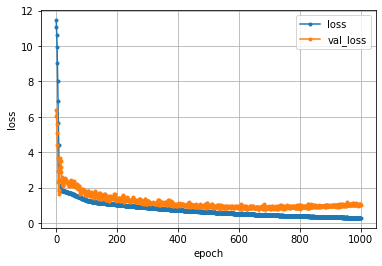

In [222]:
# 学習経過の可視化(大きさ)
size_history = history_size_array[0]
loss     = size_history.history['loss']
val_loss = size_history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [223]:
# モデルの評価(大きさ)
score = cnn_size_model.evaluate([x_size_test_array1[0], x_size_test_array2[0], x_size_test_array3[0]], y_size_test_array[0], verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 6ms/step - loss: 1.0181 - acc: 0.3667
Test loss: 1.01814603805542
Test accuracy: 0.36666667461395264


In [224]:
#大きさごとの推定精度の確認：20%以下
size_predict = cnn_size_model.predict([x_size_test_array1[0],x_size_test_array2[0],x_size_test_array3[0]])
size_answer = y_size_test_array[0]
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.2):
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.4):
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.6):
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.8):
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 1):
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.0
大きさ2の正答率：0.6363636363636364
大きさ3の正答率：0.0
大きさ4の正答率：0.0
大きさ5の正答率：0.25


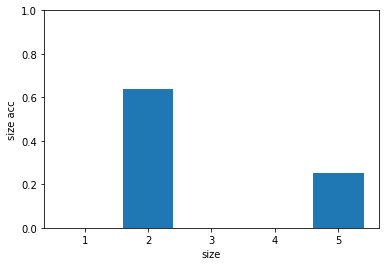

In [225]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([one_ok/one_total,two_ok/two_total,three_ok/three_total,four_ok/four_total,five_ok/five_total])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=1, bottom=0)
plt.show()

In [226]:
#大きさごとの推定精度の確認：最も近く予測
size_predict = cnn_size_model.predict([x_size_test_array1[0],x_size_test_array2[0],x_size_test_array3[0]])
size_answer = y_size_test_array[0]
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.18181818181818182
大きさ2の正答率：0.6363636363636364
大きさ3の正答率：0.0
大きさ4の正答率：0.0
大きさ5の正答率：0.0


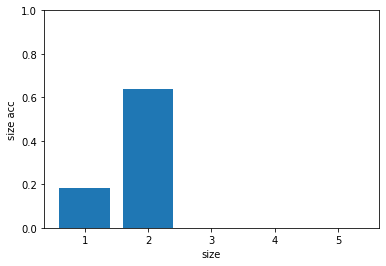

In [227]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([one_ok/one_total,two_ok/two_total,three_ok/three_total,four_ok/four_total,five_ok/five_total])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=1, bottom=0)
plt.show()